In [46]:
import numpy as np

In [129]:
import pandas as pd 
# Use pandas to load into a DataFrame
#   Y1.csv doesn't have a header so 
#   add one when loading the file
X1 = pd.read_csv("X1.csv",sep = ',')
Y1 = pd.read_csv("Y1.csv", header=None, names=['PM2.5'])

# If you prefer to work with numpy arrays : 
#X1 = X1.values

X1.head()

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,8,12.0,41.0,500.0,54.0,-0.3,1030.4,-21.2,0.0,NW,4.6,3
1,2013,3,1,9,11.0,22.0,500.0,65.0,0.4,1030.5,-23.3,0.0,N,5.5,9
2,2013,3,2,7,11.0,18.0,500.0,45.0,-4.0,1026.6,-14.2,0.0,E,1.2,6
3,2013,3,2,11,27.0,45.0,1399.0,31.0,2.5,1026.4,-17.1,0.0,SSW,2.0,5
4,2013,3,2,14,24.0,35.0,800.0,53.0,3.9,1026.8,-18.3,0.0,SSW,0.4,9


In [130]:
def time_to_coord(X1):
    sec_per_hour = 3600
    sec_per_day = 24*sec_per_hour
    sec_per_month = 30.4375*sec_per_day
    sec_per_year = 12*sec_per_month
    alpha = np.zeros(X1.shape[0])
    theta = np.zeros(X1.shape[0])
    for index, row in X1.iterrows():
        seconds = int(row['month'])*sec_per_month + int(row['day'])*sec_per_day + int(row['hour']*sec_per_hour)
        seconds_tot = seconds + int(row['year']-2013)*sec_per_year
        alpha[index] = 2*np.pi*seconds/sec_per_year
        theta[index] = seconds_tot/sec_per_year
    X1.insert(X1.shape[1], "alpha", alpha, True) 
    X1.insert(X1.shape[1], "theta", theta, True) 
    return X1

In [131]:
def wd_to_coord(X1):
    for index, row in X1.iterrows():
        if row['wd'] == 'E': 
            X1.at[index,'wd'] = 2*np.pi*(0/16)
        elif row['wd'] == 'ENE': 
            X1.at[index,'wd'] = 2*np.pi*(1/16)
        elif row['wd'] == 'NE': 
            X1.at[index,'wd'] = 2*np.pi*(2/16)
        elif row['wd'] == 'NNE': 
            X1.at[index,'wd'] = 2*np.pi*(3/16)
        elif row['wd'] == 'N': 
            X1.at[index,'wd'] = 2*np.pi*(4/16)
        elif row['wd'] == 'NNW': 
            X1.at[index,'wd'] = 2*np.pi*(5/16)
        elif row['wd'] == 'NW': 
            X1.at[index,'wd'] = 2*np.pi*(6/16)
        elif row['wd'] == 'WNW': 
            X1.at[index,'wd'] = 2*np.pi*(7/16)
        elif row['wd'] == 'W': 
            X1.at[index,'wd'] = 2*np.pi*(8/16)
        elif row['wd'] == 'WSW': 
            X1.at[index,'wd'] = 2*np.pi*(9/16)
        elif row['wd'] == 'SW': 
            X1.at[index,'wd'] = 2*np.pi*(10/16)
        elif row['wd'] == 'SSW': 
            X1.at[index,'wd'] = 2*np.pi*(11/16)
        elif row['wd'] == 'S': 
            X1.at[index,'wd'] = 2*np.pi*(12/16)
        elif row['wd'] == 'SSE': 
            X1.at[index,'wd'] = 2*np.pi*(13/16)
        elif row['wd'] == 'SE': 
            X1.at[index,'wd'] = 2*np.pi*(14/16)
        else : 
            X1.at[index,'wd'] = 2*np.pi*(15/16)
    return X1

In [132]:
X1 = time_to_coord(X1)
X1 = wd_to_coord(X1)

In [133]:
X1.head()

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,alpha,theta
0,2013,3,1,8,12.0,41.0,500.0,54.0,-0.3,1030.4,-21.2,0.0,2.35619,4.6,3,1.593733,0.253650
1,2013,3,1,9,11.0,22.0,500.0,65.0,0.4,1030.5,-23.3,0.0,1.5708,5.5,9,1.594450,0.253765
2,2013,3,2,7,11.0,18.0,500.0,45.0,-4.0,1026.6,-14.2,0.0,0,1.2,6,1.610219,0.256274
3,2013,3,2,11,27.0,45.0,1399.0,31.0,2.5,1026.4,-17.1,0.0,4.31969,2.0,5,1.613086,0.256731
4,2013,3,2,14,24.0,35.0,800.0,53.0,3.9,1026.8,-18.3,0.0,4.31969,0.4,9,1.615236,0.257073


In [134]:
type(X1)

pandas.core.frame.DataFrame

In [135]:
X1 = X1.drop(['year', 'month','day','hour'], axis=1)

In [136]:
X1.head()

,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,alpha,theta
0,12.0,41.0,500.0,54.0,-0.3,1030.4,-21.2,0.0,2.35619,4.6,3,1.593733,0.253650
1,11.0,22.0,500.0,65.0,0.4,1030.5,-23.3,0.0,1.5708,5.5,9,1.594450,0.253765
2,11.0,18.0,500.0,45.0,-4.0,1026.6,-14.2,0.0,0,1.2,6,1.610219,0.256274
3,27.0,45.0,1399.0,31.0,2.5,1026.4,-17.1,0.0,4.31969,2.0,5,1.613086,0.256731
4,24.0,35.0,800.0,53.0,3.9,1026.8,-18.3,0.0,4.31969,0.4,9,1.615236,0.257073


In [137]:
X1 = X1.values 
Y1 = Y1.values

In [138]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, random_state=1)

In [140]:
n = 50 
neighbors = np.arange(1,n+1,1)
mse_knn = np.zeros(n)
for i in range(0,n):
    knn = KNeighborsRegressor(n_neighbors=neighbors[i], metric='euclidean')
    y_knn = knn.fit(X_train, y_train).predict(X_test)
    mse_knn[i] = np.square(np.subtract(y_knn, y_test)).mean()

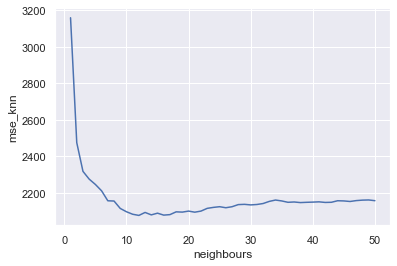

In [141]:
fig = plt.figure(figsize=(6,4))

plt.plot(neighbors,mse_knn, 'b')
plt.xlabel('neighbours')
plt.ylabel('mse_knn')

plt.show()

#plot_file = "./knn_mse.eps"
#fig.savefig(plot_file, facecolor='w', edgecolor='w', format='eps', bbox_inches='tight', pad_inches=0)

In [142]:
from sklearn import linear_model

In [159]:
n = 50 
alpha = np.logspace(-4.0, 4.0, num=n)
mse_lasso = np.zeros(n)
for i in range(0,n):
    clf = linear_model.Lasso(alpha=alpha[i])
    y_lasso = clf.fit(X_train, y_train).predict(X_test)
    mse_lasso[i] = np.square(np.subtract(y_lasso, y_test)).mean()

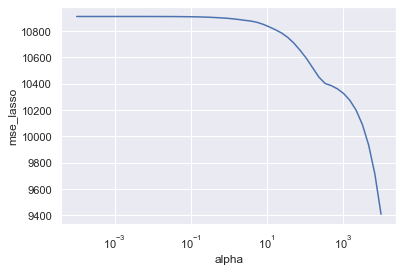

In [160]:
fig = plt.figure(figsize=(6,4))

plt.plot(alpha,mse_lasso, 'b')
plt.xlabel('alpha')
plt.ylabel('mse_lasso')
plt.xscale('log')
plt.show()

In [180]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X1_PCA = pca.fit_transform(X1)
print(pca.explained_variance_ratio_)

[9.96875093e-01 2.23646809e-03 4.16334588e-04 2.88150678e-04]


In [181]:
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X1_PCA, Y1, random_state=1)

In [182]:
n = 50 
neighbors = np.arange(1,n+1,1)
mse_PCA_knn = np.zeros(n)
for i in range(0,n):
    knn = KNeighborsRegressor(n_neighbors=neighbors[i], metric='euclidean')
    y_PCA_knn = knn.fit(X_PCA_train, y_train).predict(X_PCA_test)
    mse_PCA_knn[i] = np.square(np.subtract(y_PCA_knn, y_PCA_test)).mean()

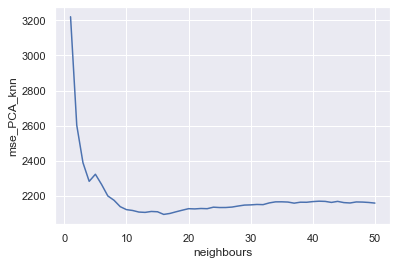

In [183]:
fig = plt.figure(figsize=(6,4))

plt.plot(neighbors,mse_PCA_knn, 'b')
plt.xlabel('neighbours')
plt.ylabel('mse_PCA_knn')

plt.show()